# Prediction (out of sample)

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

plt.rc("figure", figsize=(16, 8))
plt.rc("font", size=14)

## Artificial data

In [3]:
nsample = 50
sig = 0.25
x1 = np.linspace(0, 20, nsample)
X = np.column_stack((x1, np.sin(x1), (x1 - 5) ** 2))
X = sm.add_constant(X)
beta = [5.0, 0.5, 0.5, -0.02]
y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

## Estimation 

In [4]:
olsmod = sm.OLS(y, X)
olsres = olsmod.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     782.6
Date:                Thu, 29 Jun 2023   Prob (F-statistic):           1.82e-39
Time:                        11:02:30   Log-Likelihood:                -4.1065
No. Observations:                  50   AIC:                             16.21
Df Residuals:                      46   BIC:                             23.86
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9704      0.093     53.247      0.0

## In-sample prediction

In [5]:
ypred = olsres.predict(X)
print(ypred)

[ 4.47356893  4.97634775  5.43653152  5.82405681  6.11970992  6.31828364
  6.42943279  6.47608794  6.49068802  6.50985065  6.568356    6.69343249
  6.90028325  7.18958828  7.54739273  7.94739965  8.35529048  8.73436354
  9.05156395  9.28291451  9.41745504  9.45904315  9.42572041  9.34674818
  9.25780007  9.19510085  9.18947481  9.26128146  9.41707046  9.64850559
  9.93373433 10.24097816 10.53375371 10.77686688 10.94219507 11.01330773
 10.98816578 10.87945667 10.71250983 10.52113517 10.34206816 10.20893429
 10.14672457 10.16768947 10.26932631 10.43479035 10.63566241 10.836618
 11.00123108 11.09795873]


## Create a new sample of explanatory variables Xnew, predict and plot

In [6]:
x1n = np.linspace(20.5, 25, 10)
Xnew = np.column_stack((x1n, np.sin(x1n), (x1n - 5) ** 2))
Xnew = sm.add_constant(Xnew)
ynewpred = olsres.predict(Xnew)  # predict out of sample
print(ynewpred)

[11.09356458 10.94460399 10.67270985 10.32718084  9.97291131  9.67450297
  9.48044807  9.41125684  9.45443585  9.56754687]


## Plot comparison

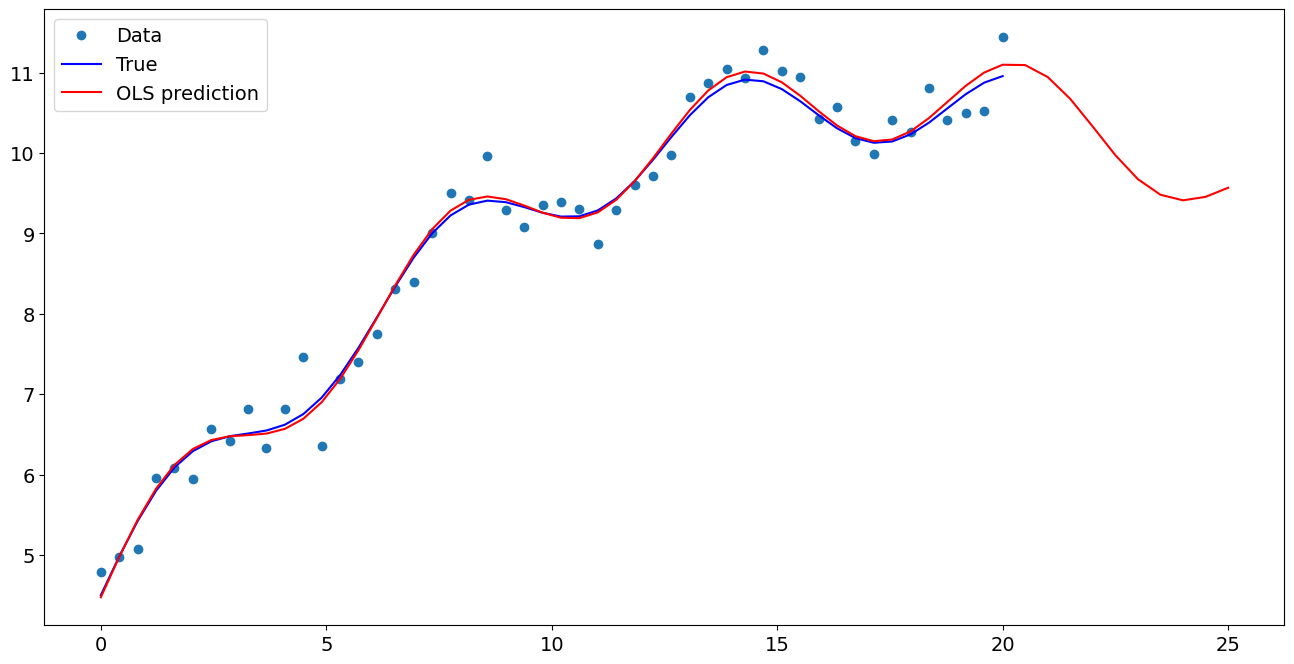

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(x1, y, "o", label="Data")
ax.plot(x1, y_true, "b-", label="True")
ax.plot(np.hstack((x1, x1n)), np.hstack((ypred, ynewpred)), "r", label="OLS prediction")
ax.legend(loc="best")

## Predicting with Formulas

Using formulas can make both estimation and prediction a lot easier

In [8]:
from statsmodels.formula.api import ols

data = {"x1": x1, "y": y}

res = ols("y ~ x1 + np.sin(x1) + I((x1-5)**2)", data=data).fit()

We use the `I` to indicate use of the Identity transform. Ie., we do not want any expansion magic from using `**2`

In [9]:
res.params

Intercept           4.970367
x1                  0.504758
np.sin(x1)          0.551632
I((x1 - 5) ** 2)   -0.019872
dtype: float64

Now we only have to pass the single variable and we get the transformed right-hand side variables automatically

In [10]:
res.predict(exog=dict(x1=x1n))

0    11.093565
1    10.944604
2    10.672710
3    10.327181
4     9.972911
5     9.674503
6     9.480448
7     9.411257
8     9.454436
9     9.567547
dtype: float64